**Task 1 : Prediction Using Supervised Learning**

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# load Dataset
df = pd.read_csv(r"http://bit.ly/w-data")

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.shape

(25, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


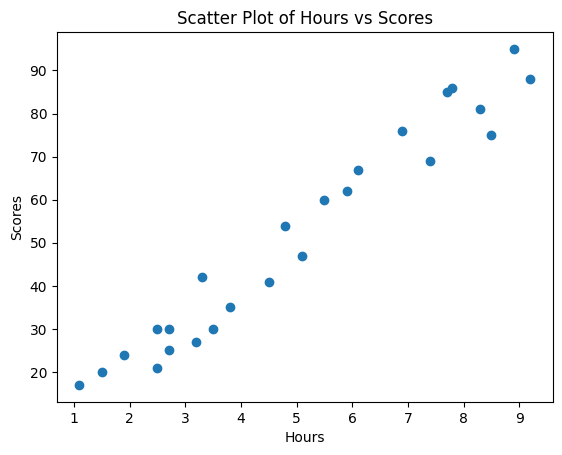

In [7]:
plt.scatter(x = df.Hours, y = df.Scores)
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Scatter Plot of Hours vs Scores")
plt.show()

In [8]:
# Data Cleaning
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [9]:
X =df.drop("Scores", axis =1)
y = df.drop("Hours", axis=1)

print("shape of x is :", X.shape)
print("shape of y is :", y.shape)


shape of x is : (25, 1)
shape of y is : (25, 1)


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=51)
print("shape of X_train = ", X_train.shape)
print("shape of y_train = ", y_train.shape)
print("shape of X_test = ", X_test.shape)
print("shape of y_test = ", y_test.shape)

shape of X_train =  (20, 1)
shape of y_train =  (20, 1)
shape of X_test =  (5, 1)
shape of y_test =  (5, 1)


**Select a model and train it**

In [11]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [12]:
lr.fit(X_train,y_train)

LinearRegression()

In [13]:
lr.coef_ #value of m

array([[9.56433743]])

In [14]:
lr.intercept_ #value of c

array([2.70197068])

In [15]:
m = 3.93
c = 50.44
y  = m * 5 + c
y

70.09

In [16]:
lr.predict([[5]])[0][0].round(2)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


50.52

In [17]:
y_pred  = lr.predict(X_test)
y_pred

array([[55.30582657],
       [76.34736893],
       [68.69589898],
       [82.08597139],
       [28.52568176]])

In [18]:
pd.DataFrame(np.c_[X_test, y_test, y_pred], columns = ["Hours","Scores_original","Scores_predicted"])

,Hours,Scores_original,Scores_predicted
0,5.5,60.0,55.305827
1,7.7,85.0,76.347369
2,6.9,76.0,68.695899
3,8.3,81.0,82.085971
4,2.7,30.0,28.525682


**Fine-tune your model**

In [19]:
lr.score(X_test,y_test)

0.9238518102278781

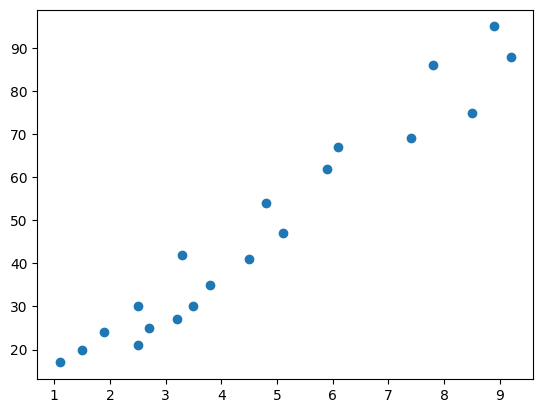

In [20]:
plt.scatter(X_train,y_train)

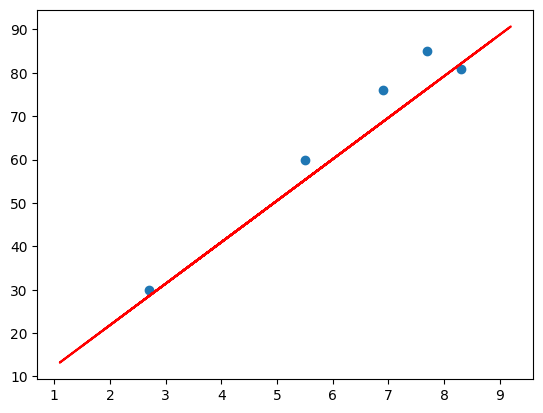

In [21]:
plt.scatter(X_test, y_test)
plt.plot(X_train, lr.predict(X_train), color = "r")